# 1.0 Full Exploratory Data Analysis

## Libraries

Cargar automaticamente los otros modulos

In [8]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [9]:
import sys
sys.path.append("..")


In [10]:
import final_project.utils.paths as path
import janitor
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

## Download data

### Specify input and output files

In [12]:
covid_url = "https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv"

covid_file = path.data_raw_dir("time_series_covid19_confirmed_global.csv")

### Run download

In [13]:
!curl {covid_url} -o {covid_file}

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 1135k  100 1135k    0     0  1417k      0 --:--:-- --:--:-- --:--:-- 1415k


## Process data

### Read data

In [14]:
input_covid_file = path.data_raw_dir("time_series_covid19_confirmed_global.csv")

In [15]:
covid_df = pd.read_csv(input_covid_file)
covid_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284 entries, 0 to 283
Columns: 799 entries, Province/State to 3/26/22
dtypes: float64(2), int64(795), object(2)
memory usage: 1.7+ MB


In [16]:
covid_df.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/17/22,3/18/22,3/19/22,3/20/22,3/21/22,3/22/22,3/23/22,3/24/22,3/25/22,3/26/22
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,176918,176983,177039,177093,177191,177255,177321,177321,177321,177321
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,272885,272961,273040,273088,273088,273146,273164,273257,273318,273387
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,265511,265524,265539,265550,265562,265573,265585,265599,265612,265621
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,39234,39234,39234,39234,39234,39234,39713,39713,39713,39713
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,99003,99003,99003,99003,99010,99058,99058,99081,99102,99106


### Process data

In [47]:
processed_df = (
    covid_df
    .select_columns(["Country/Region", "*/*/*"])
    .pivot_longer(
        index="Country/Region",
        names_to="date"
    )
    .transform_column("date", pd.to_datetime)
    .clean_names()
)

processed_df.head()

,country_region,date,value
0,Afghanistan,2020-01-22,0
1,Albania,2020-01-22,0
2,Algeria,2020-01-22,0
3,Andorra,2020-01-22,0
4,Angola,2020-01-22,0


### Save output data

In [18]:
output_covid_file = path.data_processed_dir("time_series_covid19_confirmed_global_processed.csv")

In [ ]:
processed_df.to_csv(output_covid_file, index=False)

## Explore data

### Read data

In [20]:
processed_covid_file = path.data_processed_dir("time_series_covid19_confirmed_global_processed.csv")

In [21]:
processed_covid_df = pd.read_csv(processed_covid_file)
processed_covid_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 225780 entries, 0 to 225779
Data columns (total 3 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   country_region  225780 non-null  object
 1   date            225780 non-null  object
 2   value           225780 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 5.2+ MB


In [22]:
processed_covid_df.head()

,country_region,date,value
0,Afghanistan,2020-01-22,0
1,Albania,2020-01-22,0
2,Algeria,2020-01-22,0
3,Andorra,2020-01-22,0
4,Angola,2020-01-22,0


### Explore data

In [23]:
sns.set_style("whitegrid")

In [49]:
processed_covid_df = (
    processed_covid_df
    .transform_column(
        "date",
        pd.to_datetime
    )
)
processed_covid_df

,country_region,date,value
0,Afghanistan,2020-01-22,0
1,Albania,2020-01-22,0
2,Algeria,2020-01-22,0
3,Andorra,2020-01-22,0
4,Angola,2020-01-22,0
...,...,...,...
225775,West Bank and Gaza,2022-03-26,655468
225776,Winter Olympics 2022,2022-03-26,535
225777,Yemen,2022-03-26,11803
225778,Zambia,2022-03-26,316501


#### Appearance of new covid-19 cases in Latam

Subset data.

In [25]:
countries = ['Argentina', 'Brazil', 'Chile', 'Colombia', 'Mexico', 'Peru']
some_latam_countries_df = processed_covid_df.filter_on(f"country_region in {countries}")
some_latam_countries_df.head(3)

,country_region,date,value
7,Argentina,2020-01-22,0
31,Brazil,2020-01-22,0
58,Chile,2020-01-22,0


In [42]:
import final_project.visualization.visualize as visualize

Plot time series.

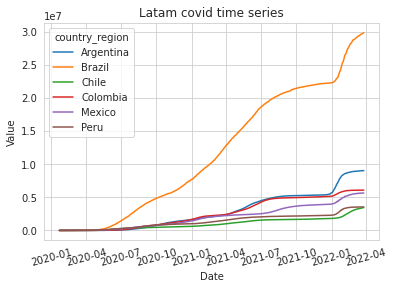

In [44]:
visualize.covid_time_series(some_latam_countries_df)

#### Latam in global context

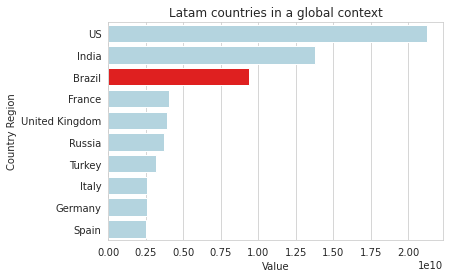

In [63]:
visualize.comparacion_paises(countries,processed_covid_df,10)